# Sentiment analysis for twitter data 

---

## NLP packages used:

> NLTK

> SpaCy

> TextBlob

## Twitter credentials

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
import os
import tweepy as tw
import configparser
config = configparser.RawConfigParser()
config.read('/content/drive/My Drive/Colab Notebooks/twitter.properties.txt')
print(config.sections());

['twitter']


In [35]:
accesstoken = config.get('twitter','accesstoken')
accesstokensecret = config.get('twitter','accesstokensecret')
apikey = config.get('twitter','apikey')
apisecretkey = config.get('twitter','apisecretkey')

In [36]:
#pass twitter credentials to tweepy
auth = tw.OAuthHandler(apikey, apisecretkey)
auth.set_access_token(accesstoken, accesstokensecret)
api = tw.API(auth,wait_on_rate_limit=True)

## USe #.... from twitter

In [37]:
search_words ='#Taliban"'
date_since='2020-11-25'
date_to='2021-12-29'

In [38]:
tweets=tw.Cursor(api.search,
                 q=search_words,
                 lang='en',
                 since=date_since).items(100)

## Get tweets, user name, and location of user

---







In [39]:
#tweet_details=[[tweet.geo, tweet.text, tweet.user.screen_name, tweet.user.location] for tweet in tweets]
tweet_details=[[ tweet.text, tweet.user.screen_name, tweet.user.location] for tweet in tweets]


## Display tweets in pandas frame

---







In [40]:
import pandas as pd

tweet_df = pd.DataFrame(data=tweet_details, columns=['text','user','location'] )

In [41]:
pd.set_option('max_colwidth',800)
tweet_df.head(20)

,text,user,location
0,RT @Its_KiranTariq: 15 of August\nFall of #Kabul\n6 September\nFall of #Panjshir\n9/11\nNew governance\nIt's surprisingly #Taliban making history…,Salman_khan2233,"Doha, Qatar"
1,RT @Poet_11111: @EmartIslamiUrdu #ImamMahdi is staying in East Khorasan. He is Muhammad Qasim bin Abdul Karim. Everybody should read his's…,castle_three,Bangladesh
2,"RT @arabnews: “The #Taliban found it easy to walk into #Kabul, offering opportunities for groups like #Daesh to expand their influence,” sa…",QamarRoshan2,
3,"RT @Massoud151: #Taliban displaced #Panjshir families forcedly and took their house &amp; land. Local reporters say, Taliban took the residents…",MalikHaanya,Panjshir
4,"RT @ZeeNewsEnglish: 'Women can't be ministers, they should give birth', says #Taliban spokesperson \n\n#AfghanistanCrisis #Afghanistan \n\nhttp…",vishalkrchsia,
5,RT @HeshmatAlavi: The #Taliban have not changed.\n\nThey're continuing to train suicide bombers.\n\n#DoNotRecognizeTaliban \nhttps://t.co/brtH3t…,LibertyForAll19,"Milwaukee, Wisconsin."
6,"RT @Massoud151: #Taliban displaced #Panjshir families forcedly and took their house &amp; land. Local reporters say, Taliban took the residents…",awara_tara,"USA, India"
7,"With at least four women, including a pregnant mother, targeted and killed by #Taliban fighters, female ex-officers… https://t.co/Gu4pLrBp4r",jftaveira1993,Portugal
8,"RT @RubinaViews: According to #indianmedia reports, #PakistanArmy drones were seen supporting the #Taliban in #Afghanistan, but these photo…",GreenWa19260767,
9,RT @Baba_khatarNaag: I reckon last July someone Upgraded the firmware of @Natsecjeff\n\nNow a days he sings only #Taliban|i songs \n\nThere is…,pratiksinghi,Mumbai


## User count of tweets

---








In [42]:
tweet_df.user.value_counts()

jagannathpol6      5
ManjuHerry         3
castle_three       2
OsintAlerts        2
Realdeep112        2
                  ..
vishalkrchsia      1
OsintUpdates       1
arabnews           1
Dhyanen05397696    1
tariqspartan2      1
Name: user, Length: 90, dtype: int64

## Location count

---



In [43]:
tweet_df.location.value_counts()

                                43
Bangladesh                       3
India                            2
Mumbai                           2
Ayodhya, India                   2
37.2546743, -115.7995238         1
Portugal                         1
QilaSaifullah, Quetta, Swat      1
गुजरात, भारत                     1
Mumbai, India                    1
Saudi Arabia                     1
Mumbai, India.                   1
USA, India                       1
Worldwide                        1
Gwalior, India                   1
Rawalpindi, Pakistan             1
France                           1
Gaborone, Botswana               1
Gurugram Haryana                 1
Bhopal, India                    1
New Delhi, India                 1
Seattle, WA                      1
🇬🇧 🇦🇫 and beyond                 1
चंडीगड़                           1
کره خاکی                         1
Istanbul, Turkey                 1
Bengaluru, India                 1
Madrid, España                   1
England             

## Clean tweets

---
> Regular expression or RegEx in Python is denoted as RE (REs, regexes or regex pattern) are imported through re module.


In [44]:
import re
def clean_tweets(text):
  text = re.sub("RT @[\w]*:","",text)   #if tweets starts with RT then return with empty and so on
  text = re.sub("@[\w]*","",text)
  text = re.sub("https?://[A-Za-z0-9./]*","",text)
  text = re.sub("\n","",text)
  return text

## Display cleaned tweets in pandas frame

---







In [45]:

tweet_df['text']=tweet_df['text'].apply(lambda x: clean_tweets(x))
tweet_df.head(20)

,text,user,location
0,15 of AugustFall of #Kabul6 SeptemberFall of #Panjshir9/11New governanceIt's surprisingly #Taliban making history…,Salman_khan2233,"Doha, Qatar"
1,#ImamMahdi is staying in East Khorasan. He is Muhammad Qasim bin Abdul Karim. Everybody should read his's…,castle_three,Bangladesh
2,"“The #Taliban found it easy to walk into #Kabul, offering opportunities for groups like #Daesh to expand their influence,” sa…",QamarRoshan2,
3,"#Taliban displaced #Panjshir families forcedly and took their house &amp; land. Local reporters say, Taliban took the residents…",MalikHaanya,Panjshir
4,"'Women can't be ministers, they should give birth', says #Taliban spokesperson #AfghanistanCrisis #Afghanistan http…",vishalkrchsia,
5,The #Taliban have not changed.They're continuing to train suicide bombers.#DoNotRecognizeTaliban …,LibertyForAll19,"Milwaukee, Wisconsin."
6,"#Taliban displaced #Panjshir families forcedly and took their house &amp; land. Local reporters say, Taliban took the residents…",awara_tara,"USA, India"
7,"With at least four women, including a pregnant mother, targeted and killed by #Taliban fighters, female ex-officers…",jftaveira1993,Portugal
8,"According to #indianmedia reports, #PakistanArmy drones were seen supporting the #Taliban in #Afghanistan, but these photo…",GreenWa19260767,
9,I reckon last July someone Upgraded the firmware of Now a days he sings only #Taliban|i songs There is…,pratiksinghi,Mumbai


In [46]:
#tweet_df.to_csv('tweets.csv')

In [47]:
#!ls

## Entity Detection using Spacy

In [48]:
#apply lambda for each tweet. Whereever there's # ignore it (earlier we did not remove # )
# Now we have all entities coming using spacy
import spacy

nlp = spacy.load('en_core_web_sm')
tweet_df['text'].apply(lambda x: [print("\tText : {}, Entity: {}".format(ent.text, ent.label_)) if (not ent.text.startswith('#')) else "" for ent in nlp(x).ents])

	Text : 15, Entity: CARDINAL
	Text : Taliban, Entity: ORG
	Text : ImamMahdi, Entity: PERSON
	Text : East Khorasan, Entity: GPE
	Text : Muhammad Qasim, Entity: PERSON
	Text : bin Abdul Karim, Entity: PERSON
	Text : Taliban, Entity: ORG
	Text : Kabul, Entity: GPE
	Text : Daesh, Entity: MONEY
	Text : Taliban, Entity: PERSON
	Text : Panjshir, Entity: MONEY
	Text : Taliban, Entity: ORG
	Text : Taliban, Entity: PERSON
	Text : Afghanistan, Entity: GPE
	Text : Taliban, Entity: ORG
	Text : They're, Entity: ORG
	Text : Taliban, Entity: PERSON
	Text : Panjshir, Entity: MONEY
	Text : Taliban, Entity: ORG
	Text : at least four, Entity: CARDINAL
	Text : Taliban, Entity: PERSON
	Text : PakistanArmy, Entity: PERSON
	Text : Taliban, Entity: ORG
	Text : Afghanistan, Entity: GPE
	Text : last July, Entity: DATE
	Text : Taliban|i, Entity: PERSON
	Text : One, Entity: CARDINAL
	Text : United Nation, Entity: ORG
	Text : Taliban, Entity: ORG
	Text : Stalwarts, Entity: LOC
	Text : Taliban, Entity: PERSON
	Text 

0                             [None, None]
1                 [None, None, None, None]
2                       [None, None, None]
3                       [None, None, None]
4                             [None, None]
                      ...                 
95          [None, None, None, None, None]
96                                  [None]
97                            [None, None]
98                            [None, None]
99    [None, None, None, None, None, None]
Name: text, Length: 100, dtype: object

## Include another column in frame to show entity

---






In [49]:
tweet_df['entities']=tweet_df['text'].apply(lambda x:[(ent.text, ent.label_) if(not ent.text.startswith('#')) else "" for ent in nlp(x).ents])
tweet_df.head(10)

,text,user,location,entities
0,15 of AugustFall of #Kabul6 SeptemberFall of #Panjshir9/11New governanceIt's surprisingly #Taliban making history…,Salman_khan2233,"Doha, Qatar","[(15, CARDINAL), (Taliban, ORG)]"
1,#ImamMahdi is staying in East Khorasan. He is Muhammad Qasim bin Abdul Karim. Everybody should read his's…,castle_three,Bangladesh,"[(ImamMahdi, PERSON), (East Khorasan, GPE), (Muhammad Qasim, PERSON), (bin Abdul Karim, PERSON)]"
2,"“The #Taliban found it easy to walk into #Kabul, offering opportunities for groups like #Daesh to expand their influence,” sa…",QamarRoshan2,,"[(Taliban, ORG), (Kabul, GPE), (Daesh, MONEY)]"
3,"#Taliban displaced #Panjshir families forcedly and took their house &amp; land. Local reporters say, Taliban took the residents…",MalikHaanya,Panjshir,"[(Taliban, PERSON), (Panjshir, MONEY), (Taliban, ORG)]"
4,"'Women can't be ministers, they should give birth', says #Taliban spokesperson #AfghanistanCrisis #Afghanistan http…",vishalkrchsia,,"[(Taliban, PERSON), (Afghanistan, GPE)]"
5,The #Taliban have not changed.They're continuing to train suicide bombers.#DoNotRecognizeTaliban …,LibertyForAll19,"Milwaukee, Wisconsin.","[(Taliban, ORG), (They're, ORG)]"
6,"#Taliban displaced #Panjshir families forcedly and took their house &amp; land. Local reporters say, Taliban took the residents…",awara_tara,"USA, India","[(Taliban, PERSON), (Panjshir, MONEY), (Taliban, ORG)]"
7,"With at least four women, including a pregnant mother, targeted and killed by #Taliban fighters, female ex-officers…",jftaveira1993,Portugal,"[(at least four, CARDINAL), (Taliban, PERSON)]"
8,"According to #indianmedia reports, #PakistanArmy drones were seen supporting the #Taliban in #Afghanistan, but these photo…",GreenWa19260767,,"[(PakistanArmy, PERSON), (Taliban, ORG), (Afghanistan, GPE)]"
9,I reckon last July someone Upgraded the firmware of Now a days he sings only #Taliban|i songs There is…,pratiksinghi,Mumbai,"[(last July, DATE), (Taliban|i, PERSON)]"


## Sentiment Analysis using NLTK

---







In [50]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

## Initialise Sentiment Analyser

---






In [51]:
sid = SentimentIntensityAnalyzer()

## Create one  more column called sentiment

---



In [52]:

tweet_df['sentiment'] = tweet_df['text'].apply(lambda x: sid.polarity_scores(x))

In [53]:
tweet_df.head(10)

,text,user,location,entities,sentiment
0,15 of AugustFall of #Kabul6 SeptemberFall of #Panjshir9/11New governanceIt's surprisingly #Taliban making history…,Salman_khan2233,"Doha, Qatar","[(15, CARDINAL), (Taliban, ORG)]","{'neg': 0.0, 'neu': 0.845, 'pos': 0.155, 'compound': 0.296}"
1,#ImamMahdi is staying in East Khorasan. He is Muhammad Qasim bin Abdul Karim. Everybody should read his's…,castle_three,Bangladesh,"[(ImamMahdi, PERSON), (East Khorasan, GPE), (Muhammad Qasim, PERSON), (bin Abdul Karim, PERSON)]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
2,"“The #Taliban found it easy to walk into #Kabul, offering opportunities for groups like #Daesh to expand their influence,” sa…",QamarRoshan2,,"[(Taliban, ORG), (Kabul, GPE), (Daesh, MONEY)]","{'neg': 0.0, 'neu': 0.608, 'pos': 0.392, 'compound': 0.8519}"
3,"#Taliban displaced #Panjshir families forcedly and took their house &amp; land. Local reporters say, Taliban took the residents…",MalikHaanya,Panjshir,"[(Taliban, PERSON), (Panjshir, MONEY), (Taliban, ORG)]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
4,"'Women can't be ministers, they should give birth', says #Taliban spokesperson #AfghanistanCrisis #Afghanistan http…",vishalkrchsia,,"[(Taliban, PERSON), (Afghanistan, GPE)]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
5,The #Taliban have not changed.They're continuing to train suicide bombers.#DoNotRecognizeTaliban …,LibertyForAll19,"Milwaukee, Wisconsin.","[(Taliban, ORG), (They're, ORG)]","{'neg': 0.333, 'neu': 0.667, 'pos': 0.0, 'compound': -0.6705}"
6,"#Taliban displaced #Panjshir families forcedly and took their house &amp; land. Local reporters say, Taliban took the residents…",awara_tara,"USA, India","[(Taliban, PERSON), (Panjshir, MONEY), (Taliban, ORG)]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
7,"With at least four women, including a pregnant mother, targeted and killed by #Taliban fighters, female ex-officers…",jftaveira1993,Portugal,"[(at least four, CARDINAL), (Taliban, PERSON)]","{'neg': 0.289, 'neu': 0.711, 'pos': 0.0, 'compound': -0.6908}"
8,"According to #indianmedia reports, #PakistanArmy drones were seen supporting the #Taliban in #Afghanistan, but these photo…",GreenWa19260767,,"[(PakistanArmy, PERSON), (Taliban, ORG), (Afghanistan, GPE)]","{'neg': 0.0, 'neu': 0.885, 'pos': 0.115, 'compound': 0.2382}"
9,I reckon last July someone Upgraded the firmware of Now a days he sings only #Taliban|i songs There is…,pratiksinghi,Mumbai,"[(last July, DATE), (Taliban|i, PERSON)]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"


In [54]:
#!pip install googlemaps
#!pip install gmaps

In [55]:

#import googlemaps
#import gmaps
#gmaps = googlemaps.Client(key=config.get('twitter','googleapikey'))
#geocode_result = gmaps.geocode(tweet_df['location'][3])
#print(geocode_result)
#print(geocode_result[0]['formatted_address'])
#print(geocode_result[0]['formatted_address'].split(",")[-1].strip())

## Wordcloud

---



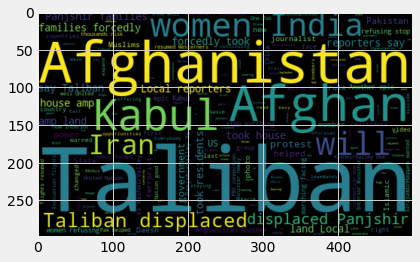

In [56]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

#Plot the worldcloud
allwords = ''.join([twts for twts in tweet_df['text']])
wordcloud = WordCloud(width=500,height=300, random_state=21,  max_font_size=119).generate(allwords)
plt.imshow(wordcloud, interpolation="bilinear")

## Claculate Subjectivity and Polarity using TextBlob

---



In [57]:
#Indent is important
#Function for subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity
  #Function for polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity
  #Create two new columns
tweet_df['Subjectivity'] = tweet_df['text'].apply(getSubjectivity)
tweet_df['Polarity']= tweet_df['text'].apply(getPolarity)
 #Show new dataframe
tweet_df.head()


,text,user,location,entities,sentiment,Subjectivity,Polarity
0,15 of AugustFall of #Kabul6 SeptemberFall of #Panjshir9/11New governanceIt's surprisingly #Taliban making history…,Salman_khan2233,"Doha, Qatar","[(15, CARDINAL), (Taliban, ORG)]","{'neg': 0.0, 'neu': 0.845, 'pos': 0.155, 'compound': 0.296}",0.500000,0.700000
1,#ImamMahdi is staying in East Khorasan. He is Muhammad Qasim bin Abdul Karim. Everybody should read his's…,castle_three,Bangladesh,"[(ImamMahdi, PERSON), (East Khorasan, GPE), (Muhammad Qasim, PERSON), (bin Abdul Karim, PERSON)]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.000000,0.000000
2,"“The #Taliban found it easy to walk into #Kabul, offering opportunities for groups like #Daesh to expand their influence,” sa…",QamarRoshan2,,"[(Taliban, ORG), (Kabul, GPE), (Daesh, MONEY)]","{'neg': 0.0, 'neu': 0.608, 'pos': 0.392, 'compound': 0.8519}",0.833333,0.433333
3,"#Taliban displaced #Panjshir families forcedly and took their house &amp; land. Local reporters say, Taliban took the residents…",MalikHaanya,Panjshir,"[(Taliban, PERSON), (Panjshir, MONEY), (Taliban, ORG)]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.100000,-0.150000
4,"'Women can't be ministers, they should give birth', says #Taliban spokesperson #AfghanistanCrisis #Afghanistan http…",vishalkrchsia,,"[(Taliban, PERSON), (Afghanistan, GPE)]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.000000,0.000000


## Drop few cols

---



In [58]:
tweet_df.drop(['user','location','entities','sentiment'],axis=1)

,text,Subjectivity,Polarity
0,15 of AugustFall of #Kabul6 SeptemberFall of #Panjshir9/11New governanceIt's surprisingly #Taliban making history…,0.500000,0.700000
1,#ImamMahdi is staying in East Khorasan. He is Muhammad Qasim bin Abdul Karim. Everybody should read his's…,0.000000,0.000000
2,"“The #Taliban found it easy to walk into #Kabul, offering opportunities for groups like #Daesh to expand their influence,” sa…",0.833333,0.433333
3,"#Taliban displaced #Panjshir families forcedly and took their house &amp; land. Local reporters say, Taliban took the residents…",0.100000,-0.150000
4,"'Women can't be ministers, they should give birth', says #Taliban spokesperson #AfghanistanCrisis #Afghanistan http…",0.000000,0.000000
...,...,...,...
95,"#Pakistan had helped the #Taliban quell the resistance in #Panjshir, #Iran’s former president warned Islamabad that it will be…",0.000000,0.000000
96,A lot of emails from defence firms keen to let me know about their latest gizmos ahead of #DSEI2021 …and I can’t help wo…,0.900000,0.500000
97,Ahmadinejad also stressed that the handing over of power to #Taliban is part of a ‘satanic plot’ by the western powers led by t…,0.000000,0.000000
98,Brutal Video shows #Taliban beating women during peaceful protest in #Kabul #worldnbc,0.750000,-0.312500


## Function for negative, neutral and positive

---



In [59]:

def getAnalysis(score):
  if score<0:
    return 'Negative'
  elif score ==0:
    return 'Neural'
  else:
    return 'Positive'
tweet_df['Analysis']=tweet_df['Polarity'].apply(getAnalysis)


tweet_df

,text,user,location,entities,sentiment,Subjectivity,Polarity,Analysis
0,15 of AugustFall of #Kabul6 SeptemberFall of #Panjshir9/11New governanceIt's surprisingly #Taliban making history…,Salman_khan2233,"Doha, Qatar","[(15, CARDINAL), (Taliban, ORG)]","{'neg': 0.0, 'neu': 0.845, 'pos': 0.155, 'compound': 0.296}",0.500000,0.700000,Positive
1,#ImamMahdi is staying in East Khorasan. He is Muhammad Qasim bin Abdul Karim. Everybody should read his's…,castle_three,Bangladesh,"[(ImamMahdi, PERSON), (East Khorasan, GPE), (Muhammad Qasim, PERSON), (bin Abdul Karim, PERSON)]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.000000,0.000000,Neural
2,"“The #Taliban found it easy to walk into #Kabul, offering opportunities for groups like #Daesh to expand their influence,” sa…",QamarRoshan2,,"[(Taliban, ORG), (Kabul, GPE), (Daesh, MONEY)]","{'neg': 0.0, 'neu': 0.608, 'pos': 0.392, 'compound': 0.8519}",0.833333,0.433333,Positive
3,"#Taliban displaced #Panjshir families forcedly and took their house &amp; land. Local reporters say, Taliban took the residents…",MalikHaanya,Panjshir,"[(Taliban, PERSON), (Panjshir, MONEY), (Taliban, ORG)]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.100000,-0.150000,Negative
4,"'Women can't be ministers, they should give birth', says #Taliban spokesperson #AfghanistanCrisis #Afghanistan http…",vishalkrchsia,,"[(Taliban, PERSON), (Afghanistan, GPE)]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.000000,0.000000,Neural
...,...,...,...,...,...,...,...,...
95,"#Pakistan had helped the #Taliban quell the resistance in #Panjshir, #Iran’s former president warned Islamabad that it will be…",ManjuHerry,,"[(Pakistan, GPE), (Taliban, ORG), (Panjshir, MONEY), (Iran, GPE), (Islamabad, GPE)]","{'neg': 0.104, 'neu': 0.896, 'pos': 0.0, 'compound': -0.2732}",0.000000,0.000000,Neural
96,A lot of emails from defence firms keen to let me know about their latest gizmos ahead of #DSEI2021 …and I can’t help wo…,JonathanSlayton,England,"[(DSEI2021, MONEY)]","{'neg': 0.0, 'neu': 0.742, 'pos': 0.258, 'compound': 0.6808}",0.900000,0.500000,Positive
97,Ahmadinejad also stressed that the handing over of power to #Taliban is part of a ‘satanic plot’ by the western powers led by t…,ManjuHerry,,"[(Ahmadinejad, PERSON), (Taliban, PERSON)]","{'neg': 0.098, 'neu': 0.902, 'pos': 0.0, 'compound': -0.34}",0.000000,0.000000,Neural
98,Brutal Video shows #Taliban beating women during peaceful protest in #Kabul #worldnbc,ve10ve,European Union,"[(Brutal Video, ORG), (Taliban, ORG)]","{'neg': 0.448, 'neu': 0.394, 'pos': 0.158, 'compound': -0.7096}",0.750000,-0.312500,Negative


## Plot polarity and Subjectivity

---



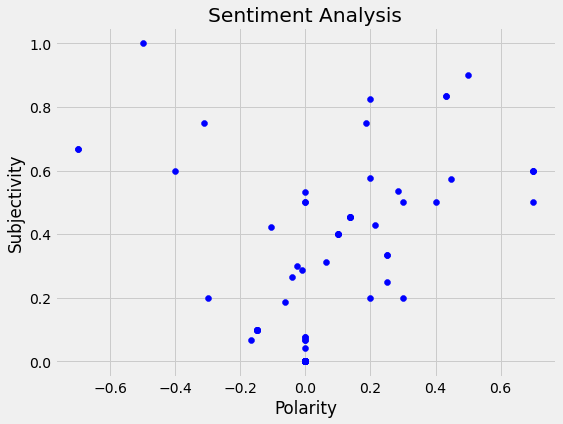

In [60]:

plt.figure(figsize=(8,6))
for i in range(0, tweet_df.shape[0]):
    plt.scatter(tweet_df['Polarity'][i], tweet_df['Subjectivity'][i],color='Blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

## Percentage of negative messages

---



In [61]:
nmsgs = tweet_df[tweet_df.Analysis == 'Negative']
nmsgs = nmsgs['text']
#tweets
round((nmsgs.shape[0]/tweet_df.shape[0])*100,1)

20.0

## Percentage of positive messages

---



In [62]:

pmsgs=tweet_df[tweet_df.Analysis == 'Positive']
pmsgs = pmsgs['text']
#ptweets
round((pmsgs.shape[0]/tweet_df.shape[0])*100,1)

30.0

## Show the value counts

---



In [63]:
tweet_df['Analysis'].value_counts()

Neural      50
Positive    30
Negative    20
Name: Analysis, dtype: int64

## Plot and visualize the counts

---



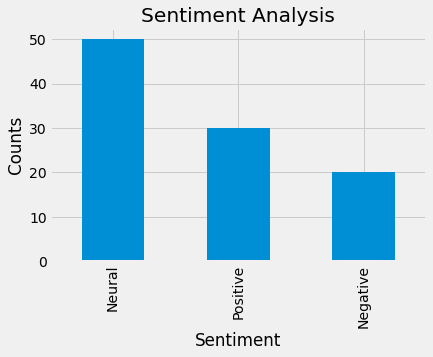

In [64]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
tweet_df['Analysis'].value_counts().plot(kind='bar')
plt.show()